# Soluciones a la tarea 3.

<img src="Img/E2.2.png">

### Solución
**(a)** **(i) Rayos positivos** Por el desarrollo del ejemplo 2.2 sabemos que en este caso $m_H(N)=N+1$. Por los discutido en clase sabemos que el break point en este caso es $bp=2$ pues existen dicotomías de 2 puntos que no pueden generarse con los rayos positivos. Procedemos entonces a verificar la cota del teorema 2.4:
$$
\sum_{i=0}^{2-1}{N \choose i}= {N \choose 0}+{N \choose 1}= 1+N
$$
Y claramente $m_H(N)\leq N+1$, por tanto la cota se tiene.<br>
**(ii) Intervalos positivos** Por el ejemplo 2.2 sabemos que $m_H(N)= \frac{1}{2}N^2+\frac{1}{2}N+1$. De nuevo, por el desarrollo en clase sabemos que $bp=3$. Verificando la cota tenemos: <br><br>
$$
\sum_{i=0}^{3-1}{N \choose i}= {N \choose 0}+{N \choose 1}+{N\choose 2}= 1+ N+\frac{N(N-1)}{2}= \frac{1}{2}N^2+\frac{1}{2}N+1
$$
<br>Asi, $m_H(N)\leq \frac{1}{2}N^2+\frac{1}{2}N+1$ y la cota se mantiene. <br>
**(iii) Conjuntos convexos** En el desarrollo de la clase se discutió que los conjuntos convexos como en el ejemplo 2.2 no tienen un break point, por tanto el teorema 2.4 no puede ser aplicado para encontrar una cota de $m_H(N)$.<br>
**(b)** Supongamos que existe un conjunto de hipotesis que cumpla $m_H(N)=N+2^{\lfloor\frac{N}{2}\rfloor}$. Para $N=3$ el número máximo de dicotomías seria $2^3=8$, sin embargo $m_H(3)=3+2^{\lfloor\frac{3}{2}\rfloor}=3+2^1=5$, y $m_H(3)<8$, esto nos dice que $N=3$ es un break point para nuestro conjunto de hipótesis. Por el desarrollo anterior podemos aplicar el teorema 2.4, para todo $N$ debe ocurrir que: 
<br><br>
$$
m_H(N)=N+2^{\lfloor\frac{N}{2}\rfloor}\leq \sum_{i=0}^{3-1}{N \choose i}=\frac{1}{2}N^2+\frac{1}{2}N+1
$$
<br>
Sin embargo, en la siguiente grafica podemos ver que para valores de $N$ mas grandes que 14 esto no pasa y por tanto estaríamos contradiciendo el teorema 2.4. Así, no existe tal conjunto de hipótesis.

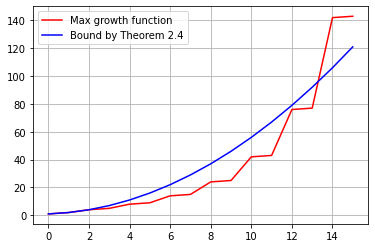

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,16, 1)
y1= x+2**(np.floor(x/2))
y2= (1/2*x**2)+(1/2*x)+1

plt.plot(x, y1, c='red', label='Max growth function')
plt.plot(x, y2, c='b', label='Bound by Theorem 2.4')
plt.grid()
plt.legend()

<img src="Img/E2.5.png">

### Solución 
Usando la cota VC tenemos los siguientes parámetros $m_H(N)=N+1$, $d_{VC}=1$, $N=100$ y $E_{out}-E_{in}=0.1$. Poniendo todo esto junto obtenemos que tenemos que solucionar a $\delta$ de:
$$
0.1=\displaystyle\sqrt{\frac{8}{100}\ln\left(\frac{4(200+1)}{\delta}\right)}
$$
Obtenemos:
$$
\delta= \frac{4(200+1)}{ e^{\displaystyle \frac{100}{8}(0.1)^2}}
$$
Calculando obtenemos:

In [25]:
(4*(200+1)/(np.exp((100/8)*(0.1)**2)))

709.5275096780147

Por tanto, la probabilidad será $\geq 1-\delta= 0$, es decir, con una probabilidad mayor o igual a cero podemos asegurar que $E_{out}$ va a estar entre 0.1 de $E_{in}$.

<img src="Img/E2.6.png">

### Solución
Usando la cota de generalización encontrada con la desigualdad de Hoeffding podemos estimar a $E_{out}$. Con una probabilidad $ \geq 1- \delta$:
<br><br>
$$
E_{out}(g) \leq E_{in}(g) +  \sqrt{\frac{1}{2N}\ln\left(\frac{2M}{\delta}\right)}
$$
<br> **(a)** Para estimar que tanto se acerca $E_{in}$ a $E_{out}$ tenemos los parámetros $N=400$, $\delta=0.05$ y $M=1000$. Debemos hacer el calculo: 
<br><br>
$$
\sqrt{\frac{1}{2\cdot400}\ln\left(\frac{2\cdot1000}{0.05}\right)}
$$
<br> Para estimar que tanto se acerca $E_{test}$ a $E_{out}$ tenemos los parámetros $N=200$, $\delta=0.05$ y $M=1$ pues aquí estamos suponiendo que solo tenemos una hipótesis, la cual es la generada por nuestro modelo de aprendizaje. Debemos hacer el cálculo:
<br><br>
$$
\sqrt{\frac{1}{2\cdot200}\ln\left(\frac{2}{0.05}\right)}
$$
<br> Ambos cálculos se encuentran a continuación:

In [38]:
delta=0.05
prt=[[400,1000],[200,1]]
res=[]
for prt in prt:
    res.append(np.sqrt((1/(2*prt[0]))*np.log(2*prt[1]/0.05)))
print('Error en la muestra es:', res[0])
print('Error de prueba es:', res[1])

Error en la muestra es: 0.11509037065006825
Error de prueba es: 0.09603227913199208


Por tanto, el 'error bar' de $E_{in}$ es más grande que el 'error bar' de $E_{test}$.
<br> **(b)** Si nos reservamos más ejemplos para probar obtenemos menos muestras para entrenar nuestro modelo, lo que lleva a producir una peor hipótesis $g$ y por tanto el error en la muestra tendera a crecer más. Aunque el error de prueba pueda decrecer no significa que $g$ aproxime bien a la función objetivo. El desempeño de los errores se puede ver en la siguiente grafica donde el número de muestras para el error de prueba va creciendo, mientras que para el entrenamiento va disminuyendo. Podemos ver además que un numero de 200 muestras para probar es un buen numero pues ambos errores se equilibran.

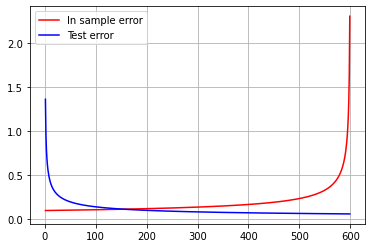

In [43]:
x = np.arange(1,600, 1)
y1= np.sqrt((1/(2*(600-x)))*np.log(2*1000/0.05))
y2=np.sqrt((1/(2*x))*np.log(2*1/0.05))

plt.plot(x, y1, c='red', label='In sample error')
plt.plot(x, y2, c='b', label='Test error')
plt.grid()
plt.xlabel("# of test examples")
plt.legend()

<img src="Img/P2.1.png">

### Solución 
Sea $\delta=0.03$. Queremos encontrar el número de ejemplos para los cuales
<br><br>
$$
\epsilon(M,N,\delta)=\sqrt{\frac{1}{2N}\ln\left(\frac{2M}{\delta}\right)} \leq 0.05
$$
<br> o lo que es igual, encontrar el valor de $N$ tal que:
$$
N\geq \frac{1}{2(0.05)^2}\ln\left(\frac{2M}{0.03}\right)
$$
<br> Para los valores de $M=1$, $M=100$, $M=10000$. El siguiente código resuelve dicho problema.

In [48]:
delta=0.03
prm=[1,100,10000]
for prm in prm:
    resul=((1/(2*(0.05)**2))*np.log(2*prm/0.03))
    print('Para M=', prm, 'necesitamos un total de', resul, 'ejemplos.' )

Para M= 1 necesitamos un total de 839.9410155759854 ejemplos.
Para M= 100 necesitamos un total de 1760.9750527736035 ejemplos.
Para M= 10000 necesitamos un total de 2682.009089971222 ejemplos.


Lo anterior nos dice que para una tolerancia al error del $97\%$ y un error de generalizacion del $5\%$ necesitaremos dicho número de ejemplos para cada diversidad en el tamaño de conjuntos de hipótesis.

<img src="Img/P2.12.png">

### Solución 
Por la cota de generalización recordemos que nuestro error de generalización está dado por:
<br><br>
$$
\epsilon=\sqrt{\frac{8}{N}\ln\left(\frac{4m_H(2N)}{\delta}\right)}
$$
<br> De nuestro ejercicio tenemos los parámetros $\delta=0.05$ y $\epsilon=0.05$. Por otro lado, probaremos que la función de crecimiento tiene la cota
<br><br>
$$
m_H(N) \leq N^{d_{VC}}+1
$$
<br>Como $m_H(N) \leq \sum_{i=0}^{k-1}{N \choose i}$, donde $k=d_{VC}+1$ bastaría con probar por inducción sobre $N$ que $\sum_{i=0}^{k}{N \choose i} \leq N^k+1$. Paso base: para $N=1$ tenemos 2 casos:
<br>$\cdot$ Para $k=0$, $\sum_{i=0}^{0}{1 \choose i}={1 \choose 0}=1$ y $1\leq 1^0+1=2$.
<br>$\cdot$ Para $k=1$, $\sum_{i=0}^{1}{1 \choose i}={1 \choose 0} +{1 \choose 1}=1+1=2$ y $2 \leq 1^1+1=2$.
<br> Por tanto el paso base se cumple. Supongamos ahora que se tiene para $N$, veamos para $N+1$. Lo siguiente se da gracias a propiedades de la combinatoria:
<br><br>
$$
\begin{align*}
\sum_{i=0}^{k}{N+1 \choose i} & = \sum_{i=0}^{k}\left({N \choose i-1} +{N \choose i} \right)\\
&= \sum_{i=0}^{k}{N \choose i-1} + \sum_{i=0}^{k}{N \choose i} \\
&= \sum_{i=0}^{k-1}{N \choose i}+ \sum_{i=0}^{k}{N \choose i}
\end{align*}
$$
<br>Aplicando la hipótesis de inducción tenemos que:
<br><br>
$$
\begin{align*}
\sum_{i=0}^{k-1}{N \choose i}+ \sum_{i=0}^{k}{N \choose i}& \leq (N^{k-1}+1)+(N^k+1) \\
&= (N^{k-1}+N^k+1)+1
\end{align*}
$$
<br> Por el binomio de Newton sabemos que $(N+1)^k=\sum_{i=0}^k {N \choose i} N^{(k-i)}$, y así $N^{k-1}+N^k+1 \leq (N+1)^k $, pues estos son solo unos cuantos de los sumandos de $(N+1)^k$. Podemos concluir entonces que:
<br><br>
$$
\sum_{i=0}^{k}{N+1 \choose i} \leq (N+1)^k +1
$$
<br>Así, por el principio de inducción matemática: para todo $N$, $\sum_{i=0}^{k}{N \choose i} \leq N^k +1$. Así, podemos concluir que $m_H(N) \leq N^{d_{VC}}+1$.
<br> Retomando el ejercicio: reemplazando ahora la nueva cota para $m_H(N)$, $d_{VC}=10$ y todos nuestros parámetros obtenemos:
<br><br>
$$
0.05\leq\sqrt{\frac{8}{N}\ln\left(\frac{4((2N)^{10}+1)}{0.05}\right)}
$$
<br>Utilizaremos el método iterativo de punto fijo con un error del $5\%$ para resolver $N$ con un error, por tanto, queremos iterar sobre $N$ de tal manera que:
<br><br>
$$
N\leq \frac{8}{(0.05)^2}\ln\left(\frac{4((2N)^{10}+1)}{0.05}\right)
$$

In [39]:
import numpy as np

epsilon=0.05
delta=0.05
dvc=10
N=10
for i in range(10000):
    rhs= (8/(0.05)**2)*np.log((4*((2*N)**10+1))/0.05)
    error= np.abs(N-rhs)
    if error<=0.05:
        break
    N=int(rhs)
print('Para una confianza del 95% y una toleracia al error del 5% en un conjunto de hipotesis con una dimension VC de 10 se necesitan como minimo:', N,'ejemplos')    

Para una confianza del 95% y una toleracia al error del 5% en un conjunto de hipotesis con una dimension VC de 10 se necesitan como minimo: 452956 ejemplos


<img src="Img/P2.16.png">

### Solución 
Sea $X=\mathbb{R}$ y 
<br><br>
$$
H=\left\{h_c | h_c(x)=sign\left(\sum_{i=0}^D c_ix^i\right)\right\}
$$
<br> **(a)** Note que $\sum_{i=0}^D c_ix^i$ determina un polinomio real de grado $D$, llamémoslo $p(x)$. Por lo anterior decimos que $p(x)$ genera $D$ puntos (raíces) sobre la recta real y $D+1$ intervalos sobre la recta real. Note que cada intervalo determina un signo diferente a la evaluación de $x\in\mathbb{R}$ con $p(x)$ ya que sus extremos son raíces de $p(x)$. Sean $D+1$ puntos sobre la recta real, note que sin importar la escogencia de estos puntos siempre podemos encontrar valores para las $c_i$ de tal manera que las raíces generadas por $p(x)$ encajen entre los $D+1$ puntos. Así, cada uno de los $D+1$ puntos estará contenido en uno y solo uno de los $D+1$ intervalos generados por las raíces de $p(x)$. Como cada uno de los intervalos determina un unico signo bajo la evaluacion de $p(x)$ para los puntos en su interior, sin importar que etiqueta de signo lleven los $D+1$ puntos, siempre podemos encontrar un polinomio que genere raíces de tal manera que el signo que asignan los intervalos coincida con el del punto que contienen. Por tanto $D+1$ puntos pueden ser shatter por $H$.
<br><br>**(b)** Sean $D+2$ puntos en $\mathbb{R}$. En este caso como $p(x)$ genera solo $D$ raíces y por tanto solo $D+1$ intervalos, sin importar la escogencia de las $c_i$, por el principio del palomar siempre al menos 2 de los $D+2$ puntos caerán en un mismo intervalo. Por el razonamiento anterior dicho intervalo determinara un único signo para sus puntos interiores, y por tanto, la dicotomía en la que los 2 puntos tengan signos diferentes no puede ser generada por $H$. Por tanto, $D+2$ puntos no pueden ser shatter por $H$. 
<br><br>Concluimos entonces por definición que la dimensión VC de $H$ es $D+1$.

<img src="Img/P2.20.png">

### Solución
Como las cotas dadas por **(c)** y **(d)** están implícitas tendremos que solucionarlas para $\epsilon$. Ambas son muy sencillas de resolver y es bajo el mismo proceso: eleve ambas partes al cuadrado, luego despeje todos los términos a la derecha y resuelva por la formula cuadrática. Con este proceso se obtienen las siguientes soluciones para los ejercicios:
<br>**(c) Parrondo and Van den Broek** 
<br><br>
$$
\epsilon \leq \frac{1}{N}\pm \sqrt{\frac{1}{N^2}+\frac{1}{N}\ln\left(\frac{6m_H(2N)}{\delta} \right)}
$$
<br>**(d) Devroye** 
<br><br>
$$
\epsilon \leq \frac{1}{N-2} \pm \sqrt{\frac{1}{(N-2)^2}+\frac{1}{2(N-2)}\ln\left(\frac{4m_H(N^2)}{\delta}\right)}
$$
<br>Note que las soluciones buscadas son las que mantienen los signos positivos. Cuando despejamos todos los términos a la derecha es como si hiciéramos $0\leq \epsilon$, y cuando resolvimos para $\epsilon$ su solución debe ser netamente positiva. A continuación, graficamos las soluciones tomando el signo $-$ para la raiz y vemos que esta no es la solución que buscamos pues en todo momento es negativa.

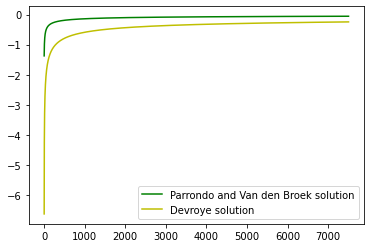

In [40]:
dvc=50
delta=0.05
x= np.arange(3,7500, 0.01)

#Parrondo and Van den Broek negative solution
pv_b_n= 1/x -np.sqrt(1/(x**2)+(1/x)*np.log((6/delta)*((2*x)**2+1)))
#Devroye negative solution
dv_b_n=1/(x-2) -np.sqrt(1/(x-2)**2 + 1/(2*(x-2)) *(np.log(4/delta)+2*dvc*np.log(x)))

plt.plot(x, pv_b_n, c='g', label='Parrondo and Van den Broek solution')
plt.plot(x, dv_b_n, c='y', label='Devroye solution')
plt.legend()

Por tanto nuestras soluciones son:
<br>**(c) Parrondo and Van den Broek** 
<br><br>
$$
\epsilon \leq \frac{1}{N}+ \sqrt{\frac{1}{N^2}+\frac{1}{N}\ln\left(\frac{6m_H(2N)}{\delta} \right)}
$$
<br>**(d) Devroye** 
<br><br>
$$
\epsilon \leq \frac{1}{N-2} + \sqrt{\frac{1}{(N-2)^2}+\frac{1}{2(N-2)}\ln\left(\frac{4m_H(N^2)}{\delta}\right)}
$$
<br><br>Antes de seguir es de importancia recalcar que para graficar la cota de **Devroye** obtenida anteriormente; la función de crecimiento $m_H(N^2)$ se acoto como $m_H(N^2)\leq N^{2d_{VC}}$ para poder aplicar operaciones de logaritmos y bajar el exponente de $N$, pues con el exponente $2d_{VC}$ se da un overflow en los cálculos para graficar. Este cambio es despreciable para números muy grandes y por tanto se hizo. Todas las demás cotas manejan la cota $m_H(N)\leq N^{d_{VC}}+1$ para la función de crecimiento.

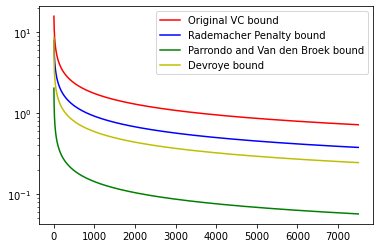

In [41]:
import numpy as np
import matplotlib.pyplot as plt

dvc=50
delta=0.05
x= np.arange(3,7500, 0.01)

#Original VC bound
vc_b= np.sqrt((8/x)*np.log((4*((2*x)**dvc+1))/delta))
#Rademacher Penalty bound
rp_b= np.sqrt((2*np.log(2*x*(x**dvc+1)))/x)+np.sqrt(-2*np.log(delta)/x)+(1/x)
#Parrondo and Van den Broek bound
pv_b= 1/x +np.sqrt(1/(x**2)+(1/x)*np.log((6/delta)*((2*x)**2+1)))
#Devroye bound
dv_b=1/(x-2) +np.sqrt(1/(x-2)**2 + 1/(2*(x-2)) *(np.log(4/delta)+2*dvc*np.log(x)))

plt.plot(x, vc_b, c='red', label='Original VC bound')
plt.plot(x, rp_b, c='b', label='Rademacher Penalty bound')
plt.plot(x, pv_b, c='g', label='Parrondo and Van den Broek bound')
plt.plot(x, dv_b, c='y', label='Devroye bound')
plt.yscale('log')
plt.legend()

Se ve entonces que la cota de **Parrondo and Van den Broek** es la mejor, pues decrece más rápido que las demás.